### Importing the necesarry libraries

In [3]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential

### Getting the CIFAR10 dataset

In [4]:
(X_train , y_train) , (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
X_train.shape # We have 32X32 fifty thousand RGB images in the train dataset

(50000, 32, 32, 3)

In [6]:
X_test.shape # We have 32X32 ten thousand RGB images in the test dataset

(10000, 32, 32, 3)

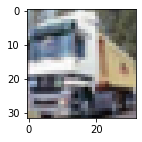

In [7]:
plt.figure(figsize=(15,2)) # This is how the images look
plt.imshow(X_train[1])

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5] 
# We need to change the shape because we are going to use sparse categorical crossentropy

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

### After reshaping the shape of y_train is

In [12]:
y_train.shape 

(50000,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### These are the various classes in the CIFAR10 dataset

In [14]:
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
def plot_sample(X,y,index): # Making a custom function that can be used to display any image
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

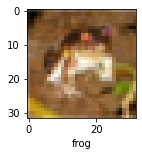

In [16]:
plot_sample(X_train,y_train,0)

### Normalizing the train and test dataset to increase learning speed

In [17]:
X_train = X_train/255 
X_test = X_test/255

### Importing callbacks for efficient and accurate training this will also help us in preventing overfitting

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Early Stopping callback is used to end the training on the best epoch according to what monitor has been used here I have used validation accuracy as my monitor for all callbacks

[Refer this for ReduceLR](https://keras.io/api/callbacks/reduce_lr_on_plateau/)
### This ReduceLROnPlateau callback helps us get to the global minima otherwise we would get stuck in the local minima

In [19]:
epochs = 100
early_stopping = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=8,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

In [20]:
test_set = (X_test,y_test) # This set of data will be used for validation 

### NOTE even though the above data is being used for validation it can still be used for evaluation of the model because our model has not directly trained on this data

### Importing the required layers

### Below I have used a unifrom dropout layer of 0.25 there are other ways like increasing the dropout rate uniformly for eg:- starting at 0.2 and going till 0.5

### Batch Normalization layer helps in making the mean output 0 and standard deviation 1 it helps in reducing the number of epochs required for training

In [21]:
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization, Flatten, Dropout

In [22]:
cnn = Sequential()

# Convolutional layers

#First layer 
cnn.add(Conv2D(filters = 32,kernel_size = (3,3),activation = "relu",padding="same",input_shape = (32,32,3)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=32,kernel_size = (3, 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

# Second layer
cnn.add(Conv2D(filters = 64,kernel_size = (3,3),activation = "relu",padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 64,kernel_size = (3, 3), activation='relu', padding='same'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

# Third layer 
cnn.add(Conv2D(filters = 128,kernel_size = (3,3),activation = "relu",padding="same"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 128,kernel_size = (3,3),activation = "relu",padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

# Dense layers
cnn.add(Flatten())

# Fully connected dense layer
cnn.add(Dense(128, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
# Prediction layer
cnn.add(Dense(10, activation = 'softmax'))

# Compiling the model
cnn.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [23]:
cnn.summary() # This is how our model looks 
# NOTE more the number of parameters longer will be the training time

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

### We are also going to augment our data to reduce overfitting and increasing accuracy you can read about image augmentation further here 
[link](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)

In [24]:
from keras.preprocessing.image import ImageDataGenerator 

In [25]:
aug = ImageDataGenerator(
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          horizontal_flip= True,
          vertical_flip= False
)
data_aug = aug.flow(X_train,y_train,64)

In [26]:
history = cnn.fit(data_aug,
        epochs=epochs,
        callbacks=callbacks_list,
       validation_data=test_set)

Epoch 1/100
782/782 [==============================] - 38s 33ms/step - loss: 1.5205 - accuracy: 0.4570 - val_loss: 1.1478 - val_accuracy: 0.5929 - lr: 0.0010
Epoch 2/100
782/782 [==============================] - 25s 32ms/step - loss: 1.0857 - accuracy: 0.6130 - val_loss: 0.8897 - val_accuracy: 0.6922 - lr: 0.0010
Epoch 3/100
782/782 [==============================] - 26s 33ms/step - loss: 0.9196 - accuracy: 0.6771 - val_loss: 1.0519 - val_accuracy: 0.6542 - lr: 0.0010
Epoch 4/100
782/782 [==============================] - 25s 32ms/step - loss: 0.8280 - accuracy: 0.7097 - val_loss: 0.7668 - val_accuracy: 0.7393 - lr: 0.0010
Epoch 5/100
782/782 [==============================] - 25s 32ms/step - loss: 0.7689 - accuracy: 0.7343 - val_loss: 0.6713 - val_accuracy: 0.7704 - lr: 0.0010
Epoch 6/100
782/782 [==============================] - 25s 32ms/step - loss: 0.7179 - accuracy: 0.7488 - val_loss: 0.7597 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 7/100
782/782 [==============================]

### The training time can be a lot depending on wether you are using a GPU or not I recommend using Google Colab to run this note book

### Importing the evaluation metrics

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

In [28]:
evals = cnn.evaluate(X_test,y_test,verbose=0)

In [29]:
print(f"Final Loss is {np.round(evals[0],3)}")

Final Loss is 0.338


In [30]:
print(f"Final Accuracy is {np.round(100*evals[1],3)}%")

Final Accuracy is 89.3%


In [32]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [33]:
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1000
           1       0.94      0.95      0.95      1000
           2       0.88      0.86      0.87      1000
           3       0.84      0.73      0.78      1000
           4       0.87      0.90      0.88      1000
           5       0.87      0.80      0.83      1000
           6       0.85      0.97      0.90      1000
           7       0.94      0.93      0.93      1000
           8       0.94      0.94      0.94      1000
           9       0.90      0.95      0.92      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Plotting accuracy and loss

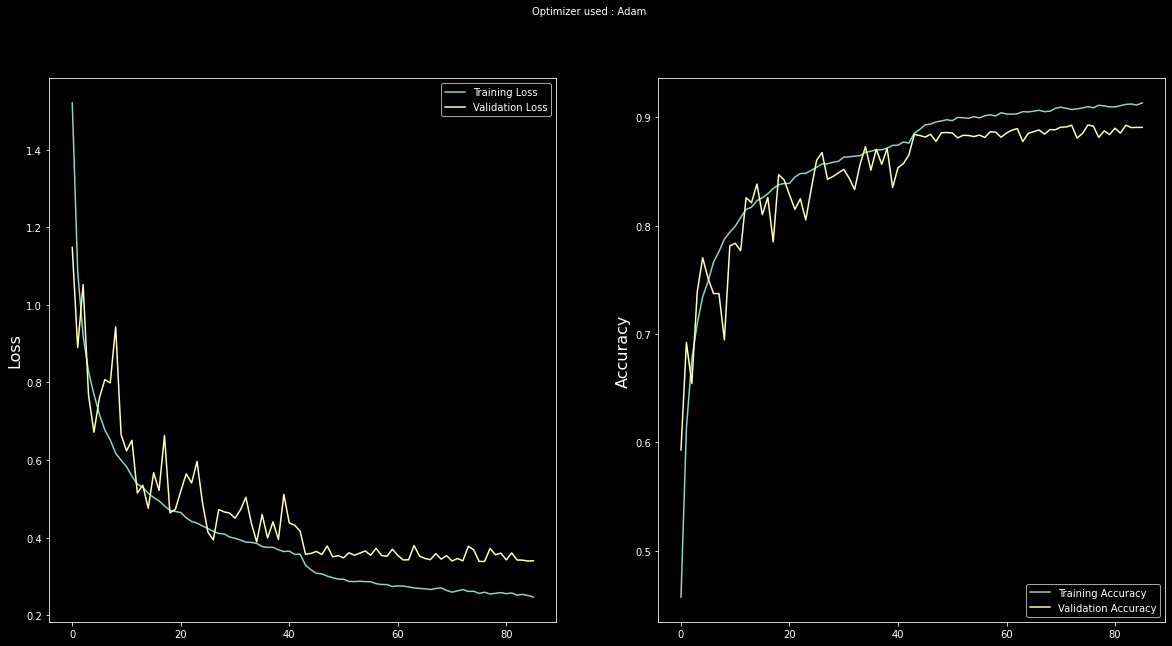

In [34]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer used : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### You can try adding or removing layers from the provided model and save it using model.save("model_name.h5")
### Also you can explore transfer learning to get even better results
## Thank you for reading

In [35]:
cnn.save("CIFAR10_model.h5")